<a href="https://colab.research.google.com/github/quarcs-lab/data-quarcs/blob/master/hccBolivia/hccBolivia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Five human capital constraints across the municipalities of Bolivia

## Initial setup

### Upload dataset



In [ ]:
# upload your .zip file

In [10]:
# change directory
%cd ../content

/content


In [11]:
# unzip file
!unzip download.zip

Archive:  download.zip
  inflating: hccBolivia.dbf          
   creating: __MACOSX/
  inflating: __MACOSX/._hccBolivia.dbf  
  inflating: hccBolivia.jpg          
  inflating: __MACOSX/._hccBolivia.jpg  
  inflating: hccBolivia.prj          
  inflating: __MACOSX/._hccBolivia.prj  
  inflating: hccBolivia.shp          
  inflating: __MACOSX/._hccBolivia.shp  
  inflating: hccBolivia.shx          
  inflating: __MACOSX/._hccBolivia.shx  
  inflating: hccBoliviaWqueen.gal    
  inflating: __MACOSX/._hccBoliviaWqueen.gal  
  inflating: README.md               


### Install libraries

In [13]:
!pip install -q geopandas
!pip install -q libpysal
!pip install -q mapclassify
!pip install -q splot
!pip install -q legendgram
!pip install -q esda
!pip install -q inequality
!pip install -q giddy
!pip install -q ipywidgets 

### Load libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import seaborn as sns
import os

import libpysal
from libpysal.weights.contiguity import Queen
from libpysal import examples
from libpysal.examples import get_path 

import mapclassify
import legendgram

import splot
from splot.esda import moran_scatterplot
from splot.esda import plot_moran
from splot.esda import lisa_cluster
from splot.esda import plot_local_autocorrelation

import esda
from esda.moran import Moran
from esda.moran import Moran_Local



# Format setup
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Explore dataset

In [15]:
# read shapefile 
gdf = gpd.read_file("hccBolivia.shp")
gdf.head()

,POLY_ID,DEPARTAMEN,mun,pop_20,s2_2_dm,s4_1_ash,s4_1_asm,s10_2_egin,s10_2_nhe,hco1,REGs22dm,REGs41ash,REGs41asm,REG102egin,REG102nhe,REGal_ints,geometry
0,1.00,Chuquisaca,Sucre,"295,476.00",14.81,4.39,2.60,0.32,7.00,-1.33,4.00,1.00,3.00,2.00,4.00,5.00,"POLYGON ((-65.14702 -18.61252, -65.14677 -18.6..."
1,2.00,Chuquisaca,Yotala,"10,017.00",14.81,2.18,0.86,0.47,16.48,-0.44,3.00,1.00,3.00,2.00,1.00,5.00,"POLYGON ((-65.24691 -19.09556, -65.24712 -19.0..."
2,3.00,Chuquisaca,Poroma,"18,947.00",40.56,6.94,6.57,0.53,49.70,3.44,4.00,2.00,2.00,5.00,4.00,7.00,"POLYGON ((-65.65823 -18.36605, -65.65684 -18.3..."
3,4.00,Chuquisaca,Azurduy,"10,948.00",40.56,8.88,7.62,0.57,31.78,3.30,4.00,2.00,3.00,5.00,1.00,5.00,"POLYGON ((-64.36172 -19.82970, -64.34352 -19.8..."
4,5.00,Chuquisaca,Tarvita,"14,688.00",40.56,4.76,4.39,0.60,44.01,3.18,4.00,1.00,3.00,5.00,4.00,7.00,"POLYGON ((-64.53151 -19.55003, -64.52247 -19.5..."


### Descriptive statistics

In [16]:
gdf.describe()

,POLY_ID,pop_20,s2_2_dm,s4_1_ash,s4_1_asm,s10_2_egin,s10_2_nhe,hco1,REGs22dm,REGs41ash,REGs41asm,REG102egin,REG102nhe,REGal_ints
count,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00
mean,170.00,"34,316.73",23.67,5.00,4.09,0.39,15.10,0.00,3.01,2.88,3.10,3.23,2.85,3.58
std,98.01,"125,307.48",12.05,2.88,2.85,0.08,13.87,1.50,1.59,1.90,1.80,1.71,1.68,2.04
min,1.00,546.00,7.64,0.00,0.00,0.20,0.66,-2.46,1.00,1.00,1.00,1.00,1.00,1.00
25%,85.50,"6,168.50",14.05,3.18,2.43,0.33,4.94,-1.02,2.00,1.00,1.00,2.00,1.00,2.00
50%,170.00,"11,256.00",23.09,4.69,3.42,0.37,9.57,-0.42,3.00,2.00,3.00,3.00,2.00,3.00
75%,254.50,"22,723.50",30.17,6.42,5.15,0.43,19.68,0.66,4.00,4.00,4.00,5.00,4.00,5.00
max,339.00,"1,722,480.00",52.58,21.15,22.22,0.64,59.94,5.63,6.00,7.00,7.00,6.00,7.00,7.00


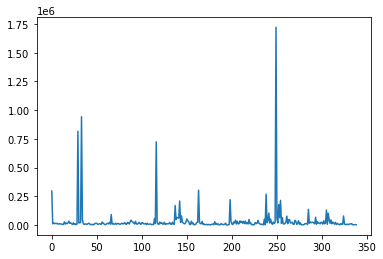

In [17]:
gdf["pop_20"].plot()

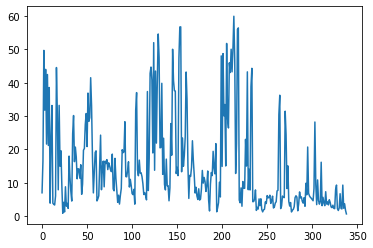

In [21]:
gdf["s10_2_nhe"].plot()

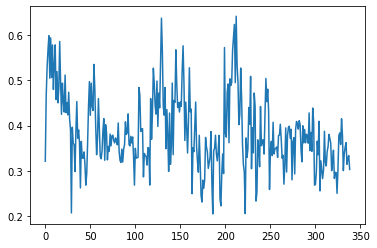

In [18]:
gdf["s10_2_egin"].plot()

### Categories

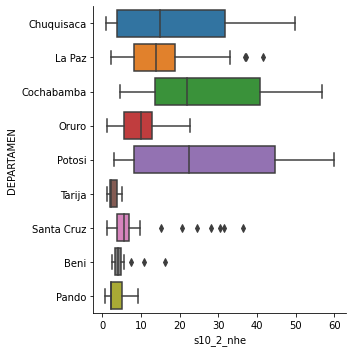

In [29]:
sns.catplot(x="s10_2_nhe", y="DEPARTAMEN", data=gdf, kind='box')

### Correlations

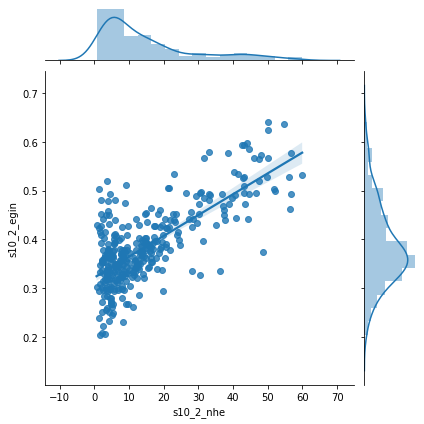

In [23]:
sns.jointplot('s10_2_nhe', 's10_2_egin', gdf, kind='reg')

## Thematic maps

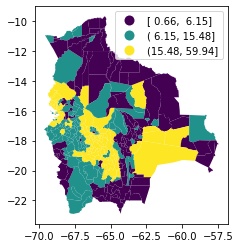

In [35]:
gdf.plot(column='s10_2_nhe', scheme='QUANTILES', k=3, legend=True)

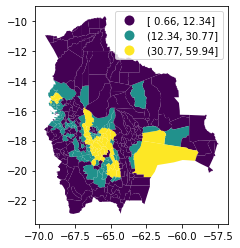

In [37]:
gdf.plot(column='s10_2_nhe', scheme='FisherJenks', k=3, legend=True)

## Spatial dependence

In [38]:
# Five natural breaks
hco1 = gdf['hco1']
mapclassify.FisherJenks(hco1, k=5)

FisherJenks           

   Interval      Count
----------------------
[-2.46, -1.08] |    78
(-1.08, -0.09] |   122
(-0.09,  1.20] |    81
( 1.20,  2.87] |    37
( 2.87,  5.63] |    21

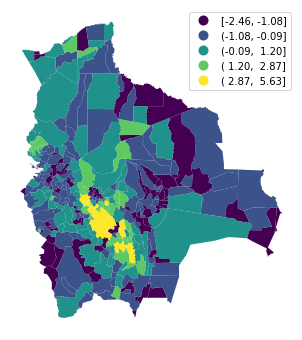

In [39]:
# Choroplet map with natural breaks
f, ax = plt.subplots(1, figsize=(6, 6))
gdf.plot(column='hco1', scheme='FisherJenks', ax=ax, legend=True, cmap="viridis")
ax.set_axis_off()
plt.savefig("map_hco1.png", dpi=300, bbox_inches='tight')
plt.show()

In [40]:
# Create W and spatial lag
hco1 = gdf['hco1'].values
w_hco1 = Queen.from_dataframe(gdf)
w_hco1.transform = 'r'
# Compute global moran
moran_hco1 = Moran(hco1, w_hco1)
moran_hco1.I

0.5682536355991463

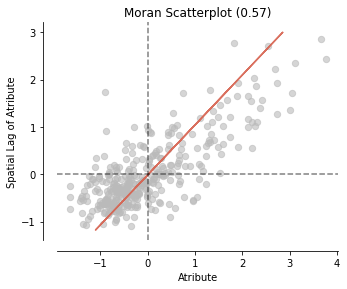

In [42]:
# Plot global moran
fig, ax = moran_scatterplot(moran_hco1, aspect_equal=True)
ax.set_xlabel('Atribute')
ax.set_ylabel('Spatial Lag of Atribute')
fig.set_size_inches(6, 4)
plt.savefig("Moran_hco1.png", dpi=300, bbox_inches='tight')
plt.show()


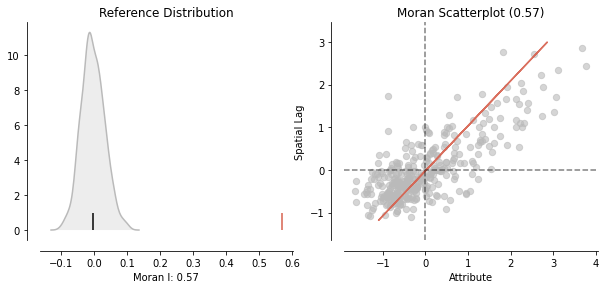

In [43]:
# Plot reference distribution for significance test
plot_moran(moran_hco1, zstandard=True)
plt.show()

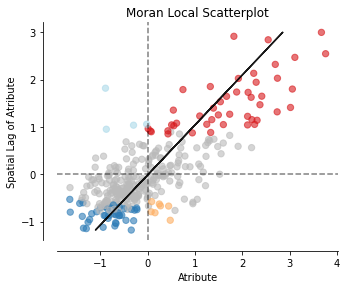

In [44]:
# Compute local moran
moran_loc_hco1 = Moran_Local(hco1, w_hco1)
# Plot local moran scatterplot
fig, ax = moran_scatterplot(moran_loc_hco1, p=0.05)
ax.set_xlabel('Atribute')
ax.set_ylabel('Spatial Lag of Atribute')
fig.set_size_inches(6, 4)
plt.savefig("lisa_hco1.png", dpi=300, bbox_inches='tight')
plt.show()

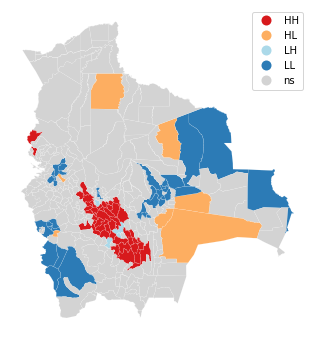

In [45]:
# Plot local moran map
lisa_cluster(moran_loc_hco1, gdf, p=0.05, figsize = (6,6))
fig.set_size_inches(6, 4)
plt.savefig("lisaMap_hco1.png", dpi=300, bbox_inches='tight')
plt.show()

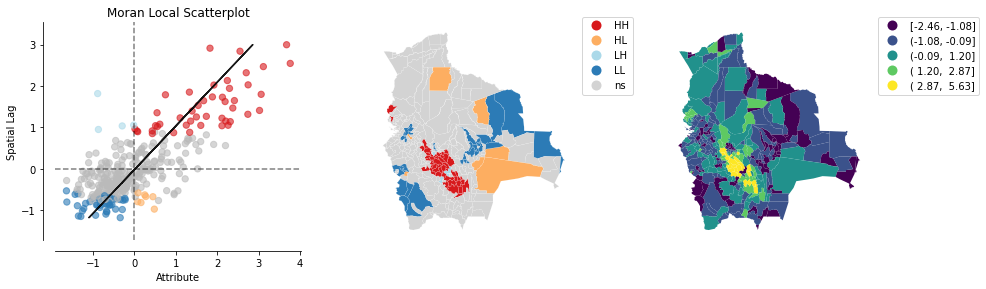

In [46]:
# Plot local moran scatterplot, lisa map, map with natural breaks
plot_local_autocorrelation(moran_loc_hco1, gdf, 'hco1', scheme='FisherJenks', cmap="viridis")
plt.savefig("moranLisaMapNb_hco1.png", dpi=300, bbox_inches='tight')
plt.show()